In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [3]:
from clean import Clean
from outlier import Outlier 
from Visualizer import *

In [5]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv('C:/Users/Dani/Telecom_Industry_User_Analytic/Data/Week1_challenge_data_source(CSV).csv', na_values=['?', None])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [7]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


In [8]:
db = Clean().drop_duplicate(db)
db.shape

(150001, 55)

In [9]:
fd = pd.read_excel("../data/Field Descriptions.xlsx")
fd

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)
5,End ms,Milliseconds offset of end time of the xDR (la...
6,Dur. (s),Total Duration of the xDR (in s)
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


In [10]:
fd.shape

(56, 2)

In [15]:
Clean.percent_missing(db)

This dataset contains 12.5 % missing values.


In [16]:
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [17]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [18]:
percent_missing = db.isnull().sum() * 100 / len(db)
missing_value_db = pd.DataFrame({'percentage_of_missed_values': percent_missing})
print(missing_value_db)

                                          percentage_of_missed_values
Bearer Id                                                    0.660662
Start                                                        0.000667
Start ms                                                     0.000667
End                                                          0.000667
End ms                                                       0.000667
Dur. (ms)                                                    0.000667
IMSI                                                         0.379997
MSISDN/Number                                                0.710662
IMEI                                                         0.381331
Last Location Name                                           0.768662
Avg RTT DL (ms)                                             18.552543
Avg RTT UL (ms)                                             18.541210
Avg Bearer TP DL (kbps)                                      0.000667
Avg Bearer TP UL (kb

In [19]:
missing_df = Clean.missing_values_table(db)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


In [20]:
missing_df.head()

,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.84,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.56,float64
Nb of sec with 125000B < Vol DL,97538,65.02,float64
TCP UL Retrans. Vol (Bytes),96649,64.43,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.39,float64


In [21]:
missing_Value = missing_df[missing_df['% of Total Values'] >=30.00].index.tolist()
missing_Value

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'TCP DL Retrans. Vol (Bytes)',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

In [22]:
columns_wanted = ['TCP UL Retrans. Vol (Bytes)','TCP DL Retrans. Vol (Bytes)']

In [23]:
remove_columns = [col for col in missing_Value if col not in columns_wanted]
remove_columns


['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

In [24]:
db = db.drop(remove_columns,axis=1)
db.shape

(150001, 47)

In [25]:
Clean.percent_missing(db)

This dataset contains 3.6 % missing values.


In [26]:
Clean.missing_values_table(db)

Your selected dataframe has 47 columns.
There are 33 columns that have missing values.


,Missing Values,% of Total Values,Dtype
TCP UL Retrans. Vol (Bytes),96649,64.43,float64
TCP DL Retrans. Vol (Bytes),88146,58.76,float64
Avg RTT DL (ms),27829,18.55,float64
Avg RTT UL (ms),27812,18.54,float64
Last Location Name,1153,0.77,object
MSISDN/Number,1066,0.71,float64
Bearer Id,991,0.66,float64
Nb of sec with Vol UL < 1250B,793,0.53,float64
UL TP > 300 Kbps (%),792,0.53,float64
50 Kbps < UL TP < 300 Kbps (%),792,0.53,float64


In [28]:
Clean.fix_missing_bfill(db, 'TCP UL Retrans. Vol (Bytes)')

0         7230.0
1         7230.0
2         7230.0
3         7230.0
4         7230.0
           ...  
149996       NaN
149997       NaN
149998       NaN
149999       NaN
150000       NaN
Name: TCP UL Retrans. Vol (Bytes), Length: 150001, dtype: float64

In [30]:
Clean.fix_missing_bfill(db, 'TCP DL Retrans. Vol (Bytes)')

0         19520.0
1         19520.0
2         19520.0
3         19520.0
4         19520.0
           ...   
149996        NaN
149997        NaN
149998        NaN
149999        NaN
150000        NaN
Name: TCP DL Retrans. Vol (Bytes), Length: 150001, dtype: float64

In [31]:
db['Avg RTT DL (ms)'].skew(skipna=True)

62.90782807995961

In [32]:
db['Avg RTT UL (ms)'].skew(skipna=True)

28.45741458546382

#### Since both are highly skewed we will use forward fill

In [33]:
Clean.fix_missing_ffill(db, 'Avg RTT DL (ms)')

0         42.0
1         65.0
2         65.0
3         65.0
4         65.0
          ... 
149996    32.0
149997    27.0
149998    43.0
149999    37.0
150000    37.0
Name: Avg RTT DL (ms), Length: 150001, dtype: float64

In [34]:
Clean.fix_missing_ffill(db, 'Avg RTT UL (ms)')

0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
149996    0.0
149997    2.0
149998    6.0
149999    5.0
150000    5.0
Name: Avg RTT UL (ms), Length: 150001, dtype: float64

In [35]:
Clean.percent_missing(db)

This dataset contains 0.19 % missing values.


In [38]:
Clean.missing_values_table(db)

Your selected dataframe has 47 columns.
There are 31 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Last Location Name,1153,0.77,object
MSISDN/Number,1066,0.71,float64
Bearer Id,991,0.66,float64
Nb of sec with Vol UL < 1250B,793,0.53,float64
UL TP > 300 Kbps (%),792,0.53,float64
50 Kbps < UL TP < 300 Kbps (%),792,0.53,float64
10 Kbps < UL TP < 50 Kbps (%),792,0.53,float64
UL TP < 10 Kbps (%),792,0.53,float64
Nb of sec with Vol DL < 6250B,755,0.50,float64
DL TP < 50 Kbps (%),754,0.50,float64


In [39]:
Clean.fix_missing_value(db, 'Handset Type', 'unknown')
Clean.fix_missing_value(db, 'Handset Manufacturer', 'unknown')

572 missing values in the column Handset Type have been replaced by unknown.
572 missing values in the column Handset Manufacturer have been replaced by unknown.


0           Samsung
1           Samsung
2           Samsung
3         undefined
4           Samsung
            ...    
149996        Apple
149997        Apple
149998        Apple
149999       Huawei
150000      unknown
Name: Handset Manufacturer, Length: 150001, dtype: object

In [40]:
Clean.percent_missing(db)

This dataset contains 0.17 % missing values.


In [48]:
db.dtypes

Bearer Id                         float64
Start                              object
Start ms                          float64
End                                object
End ms                            float64
Dur. (ms)                         float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
TCP DL Retrans. Vol (Bytes)       float64
TCP UL Retrans. Vol (Bytes)       float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              

In [49]:
Clean.convert_to_datetime(db, ['Start', 'End'])

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,65.0,5.0,44.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:00,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.0,0.0,52.0,65.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,42376.0,41915.0,8.123076e+07,Apple,Apple iPhone 8 Plus (A1897),223.0,229.0,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,2019-04-29 07:28:00,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,27.0,2.0,23.0,54.0,NaN,NaN,1

In [58]:
# get the columns with object data type
string_columns = db.select_dtypes(include='object').columns.tolist()
string_columns

['End', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [59]:
Clean.convert_to_datetime(db, ['End'])

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,65.0,5.0,44.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:00,451.0,2019-04-30 06:02:00,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.0,0.0,52.0,65.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,42376.0,41915.0,8.123076e+07,Apple,Apple iPhone 8 Plus (A1897),223.0,229.0,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,2019-04-29 07:28:00,483.0,2019-04-30 10:41:00,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D1022

In [60]:
db.dtypes

Bearer Id                                float64
Start                             datetime64[ns]
Start ms                                 float64
End                               datetime64[ns]
End ms                                   float64
Dur. (ms)                                float64
IMSI                                     float64
MSISDN/Number                            float64
IMEI                                     float64
Last Location Name                        object
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

In [61]:
# get the columns with object data type
string_columns = db.select_dtypes(include='object').columns.tolist()
string_columns

['Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [62]:
Clean.convert_to_string(db, string_columns)

In [65]:
db.dtypes

Bearer Id                                float64
Start                             datetime64[ns]
Start ms                                 float64
End                               datetime64[ns]
End ms                                   float64
Dur. (ms)                                float64
IMSI                                     float64
MSISDN/Number                            float64
IMEI                                     float64
Last Location Name                        string
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

In [67]:
db.to_csv('../data/preprocessed_data.csv')

In [25]:
db.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
0,0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,244914.875,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,2.449158e+08,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,244914.875,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,2.449158e+08,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,244914.875,2.082008e+14,3.373178e+10,3.528151e+13,D42335A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,2.449158e+08,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,244914.875,2.082014e+14,3.373178e+10,3.535661e+13,T21824A,65.0,5.0,44.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,2.449158e+08,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,244914.875,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,2.449158e+08,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


In [40]:
#Top ten handsets 
Top_handsets = pd.DataFrame({'number of users':db.groupby(['Handset Type'])['Bearer Id'].count()}).reset_index()
Top_handsets = Top_handsets.sort_values(['number of users'],ascending=False)
print("\nTOP TEN HANDSETS")
Top_handsets.head(10)


TOP TEN HANDSETS


,Handset Type,number of users
316,Huawei B528S-23A,19752
53,Apple iPhone 6S (A1688),9401
49,Apple iPhone 6 (A1586),9004
1395,undefined,8960
59,Apple iPhone 7 (A1778),6301
73,Apple iPhone Se (A1723),5176
66,Apple iPhone 8 (A1905),4985
78,Apple iPhone Xr (A2105),4562
955,Samsung Galaxy S8 (Sm-G950F),4504
75,Apple iPhone X (A1901),3809


In [43]:
#top 3 handset manufacturers
Top_handset_manf = pd.DataFrame({'handsets manufactured':db.groupby(['Handset Manufacturer'])['Bearer Id'].count()}).reset_index()
Top_handset_manf = Top_handset_manf.sort_values(['handsets manufactured'],ascending=False).reset_index()
print('\nTOP THREE HANDSET MANUFACTURERES\n')
Top_handset_manf.head(3)


TOP THREE HANDSET MANUFACTURERES



,index,Handset Manufacturer,handsets manufactured
0,5,Apple,59440
1,103,Samsung,40689
2,52,Huawei,34353


In [45]:
#top 5 handsets per top 3 handset manufacturer
# df_handset_manf[df_handset_manf["Handset Manufacturer"] == "Apple"]
top_handset_apple = db.groupby(['Handset Manufacturer']).get_group('Apple')[["Handset Type","Bearer Id"]].sort_values(by="Bearer Id",ascending=False)
top_handset_samsung = db.groupby(['Handset Manufacturer']).get_group('Samsung')[["Handset Type","Bearer Id"]].sort_values(by="Bearer Id",ascending=False)
top_handset_huawei= db.groupby(['Handset Manufacturer']).get_group('Huawei')[["Handset Type","Bearer Id"]].sort_values(by="Bearer Id",ascending=False)
print(top_handset_apple.head(5),"\n\n")
print(top_handset_samsung.head(5),"\n\n")
print(top_handset_huawei.head(5))

                       Handset Type     Bearer Id
118644  Apple iPhone 7 Plus (A1784)  1.318654e+19
118756  Apple iPhone 7 Plus (A1784)  1.318654e+19
93449        Apple iPhone 6 (A1549)  1.318654e+19
92172       Apple iPhone Se (A1723)  1.318654e+19
92010       Apple iPhone 6S (A1688)  1.318654e+19 


                             Handset Type     Bearer Id
117816       Samsung Galaxy S7 (Sm-G930X)  1.318654e+19
97250                   Samsung Galaxy J6  1.318654e+19
90717   Samsung Galaxy S9 Plus (Sm-G965F)  1.318654e+19
87479        Samsung Galaxy S8 (Sm-G950F)  1.318654e+19
85997         Samsung Galaxy J3 (Sm-J330)  1.318654e+19 


            Handset Type     Bearer Id
144432    Huawei P20 Pro  1.318654e+19
138245  Huawei B525S-23A  1.318654e+19
137640  Huawei B525S-23A  1.318654e+19
132386    Huawei P20 Pro  1.318654e+19
122023  Huawei B525S-23A  1.318654e+19


## OverView 

In [55]:
#number of xDR sessions
xdr_session = db.groupby('MSISDN/Number').agg({'Bearer Id': 'count' }).reset_index()
xdr_session['no.xdr_session'] = xdr_session['Bearer Id']
xdr2 = xdr_session.groupby('MSISDN/Number').agg({'no.xdr_session': 'sum'}).reset_index()
xdr2.head(10)

,MSISDN/Number,no.xdr_session
0,3.360300e+10,805
1,3.360301e+10,2
2,3.360301e+10,1
3,3.360301e+10,1
4,3.360301e+10,1
5,3.360301e+10,2
6,3.360302e+10,1
7,3.360302e+10,1
8,3.360302e+10,1
9,3.360302e+10,1


In [54]:
#Session duration
Session_duration = db.groupby('MSISDN/Number').agg({'Dur. (ms)':'sum',}).reset_index()
Session_duration.head(10)

,MSISDN/Number,Dur. (ms)
0,3.360300e+10,7.613873e+07
1,3.360301e+10,1.203250e+05
2,3.360301e+10,1.357180e+05
3,3.360301e+10,1.099060e+05
4,3.360301e+10,1.359680e+05
5,3.360301e+10,3.178510e+05
6,3.360302e+10,2.333000e+04
7,3.360302e+10,2.040000e+04
8,3.360302e+10,1.276990e+05
9,3.360302e+10,4.991300e+04


In [57]:
#the total download (DL) and upload (UL) data
db['Total(UL/DL)'] = db['Total UL (Bytes)'] + db['Total DL (Bytes)']
total_ul_dl = db.groupby('MSISDN/Number').agg({'Total(UL/DL)':'sum'}).reset_index()
total_ul_dl.head(10)

,MSISDN/Number,Total(UL/DL)
0,3.360300e+10,4.095721e+11
1,3.360301e+10,6.424631e+08
2,3.360301e+10,8.640132e+08
3,3.360301e+10,1.223044e+08
4,3.360301e+10,4.467712e+08
5,3.360301e+10,7.844932e+08
6,3.360302e+10,4.269253e+08
7,3.360302e+10,4.062485e+08
8,3.360302e+10,6.763139e+08
9,3.360302e+10,6.977717e+08


In [104]:
#the total data volume (in Bytes) during this session for each application
total_volume = db.groupby('MSISDN/Number')[['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)']].sum()
total_volume.nlargest(10, 'Total Data Volume (Bytes)')

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,,,,,,
3.373178e+10,4.270913e+10,1.821384e+11,5.283870e+10,5.297344e+11,5.289605e+11,9.964063e+12,1.005305e+13,1.149296e+13
3.360300e+10,1.490031e+09,6.409731e+09,1.840561e+09,1.829056e+10,1.826693e+10,3.566571e+11,3.454226e+11,4.095721e+11
3.361489e+10,2.829454e+07,1.279738e+08,4.078863e+07,3.943702e+08,3.614010e+08,7.749432e+09,7.639264e+09,8.846226e+09
3.362578e+10,2.713550e+07,1.423079e+08,4.063397e+07,4.529588e+08,3.569806e+08,7.326673e+09,6.354583e+09,8.499621e+09
3.362632e+10,4.337478e+07,1.521919e+08,4.241878e+07,3.744830e+08,3.287257e+08,6.887572e+09,8.167878e+09,7.971167e+09
3.367588e+10,1.922292e+07,1.098605e+08,3.151442e+07,3.174106e+08,3.090932e+08,6.970568e+09,6.798515e+09,7.891111e+09
3.365973e+10,3.541236e+07,1.165163e+08,3.599979e+07,2.579911e+08,3.995191e+08,6.725559e+09,6.317415e+09,7.705863e+09
3.366646e+10,1.862999e+07,8.932074e+07,2.555714e+07,2.273360e+08,2.144169e+08,6.646303e+09,4.349141e+09,7.308501e+09
3.366471e+10,1.939060e+07,9.038937e+07,2.142601e+07,2.768340e+08,2.517988e+08,6.103856e+09,3.976960e+09,6.872347e+09


## Outlier 

In [6]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv('C:/Users/Dani/Telecom_Industry_User_Analytic/Data/preprocessed_data.csv', na_values=['?', None])
db.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,65.0,5.0,44.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [8]:
db.shape

(150001, 48)

In [9]:
Outlier = Outlier(db)

In [10]:
columns = db.select_dtypes('float64').columns.tolist()
columns

['Bearer Id',
 'Start ms',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [11]:
Outlier.getOverview(columns)

Name of columns,DL TP > 1 Mbps (%),10 Kbps < UL TP < 50 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Nb of sec with Vol UL < 1250B,Nb of sec with Vol DL < 6250B,MSISDN/Number,UL TP < 10 Kbps (%),TCP DL Retrans. Vol (Bytes),Avg Bearer TP UL (kbps),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),Avg RTT DL (ms),Avg RTT UL (ms),50 Kbps < DL TP < 250 Kbps (%),IMSI,Avg Bearer TP DL (kbps),Dur. (ms),Dur. (ms).1,50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Total UL (Bytes),Other DL (Bytes),Youtube DL (Bytes),Other UL (Bytes),Gaming UL (Bytes),Gaming DL (Bytes),Netflix UL (Bytes),Netflix DL (Bytes),Youtube UL (Bytes),Bearer Id,Email UL (Bytes),Email DL (Bytes),Google UL (Bytes),Google DL (Bytes),Social Media UL (Bytes),Social Media DL (Bytes),Start ms,IMEI,End ms,Total DL (Bytes)
Min,0,0,0,0,0,1,1,3.3601e+10,0,2,0,1,0,0,0,0,2.04047e+14,0,7142,7.14299e+06,0,0,2.86689e+06,3290,53,148,59,2516,35,42,105,6.91754e+18,2,14,3,207,0,12,0,4.40015e+11,0,7.11404e+06
Q1,0,0,0,14877.8,21539.8,106,87,3.36513e+10,99,24875,47,3321.5,91,31,2,0,2.08201e+14,43,57440.5,5.74408e+07,0,0,3.3222e+07,2.10187e+08,5.8335e+06,4.14594e+06,4.12848e+06,2.10473e+08,5.47598e+06,5.77716e+06,5.51796e+06,7.34988e+18,233383,892793,1.02428e+06,2.88239e+06,16448,899148,250,3.54607e+13,251,2.43107e+08
Median,0,0,0,39304.5,46793.5,217,203,3.36637e+10,100,389664,63,16380,100,44,5,0,2.08202e+14,63,86399,8.64e+07,0,0,4.11433e+07,4.21803e+08,1.1616e+07,8.26707e+06,8.29121e+06,4.23408e+08,1.09964e+07,1.16422e+07,1.10134e+07,7.34988e+18,466250,1.79350e+06,2.05457e+06,5.76583e+06,32920,1.79437e+06,499,3.5722e+13,500,4.55841e+08
Q3,0,0,1,679610,599095,2451,2650,3.36835e+10,100,3.06207e+06,1120,68245,100,67,13,4,2.08202e+14,19710.8,132430,1.32431e+08,0,0,4.90342e+07,6.31692e+08,1.74485e+07,1.23841e+07,1.24316e+07,6.33174e+08,1.65073e+07,1.74705e+07,1.65156e+07,1.30424e+19,700440,2.68933e+06,3.08845e+06,8.62355e+06,49334,2.69494e+06,749,8.61197e+13,750,6.65706e+08
Max,94,98,100,1.36536e+08,1.44911e+08,604122,604061,8.82397e+14,100,4.29443e+09,58613,2.90823e+09,100,96923,7120,93,2.14074e+14,378160,1.85934e+06,1.85934e+09,100,96,7.83313e+07,8.43442e+08,2.32591e+07,1.65588e+07,1.65588e+07,8.43442e+08,2.2012e+07,2.32592e+07,2.2012e+07,1.31865e+19,936418,3.58615e+06,4.12136e+06,1.14628e+07,65870,3.58606e+06,999,9.90012e+13,999,9.0297e+08
IQR,0,0,1,664732,577556,2345,2563,3.21952e+07,1,3.0372e+06,1073,64923.5,9,36,11,4,3.70356e+08,19667.8,74989.8,7.499e+07,0,0,1.58122e+07,4.21505e+08,1.1615e+07,8.23820e+06,8.30315e+06,4.22701e+08,1.10313e+07,1.16933e+07,1.09976e+07,5.69254e+18,467057,1.79653e+06,2.06418e+06,5.74116e+06,32886,1.79579e+06,499,5.0659e+13,499,4.22599e+08
Lower fence,0,0,-1.5,-982220,-844794,-3411.5,-3757.5,3.3603e+10,97.5,-4.53092e+06,-1562.5,-94063.8,77.5,-23,-14.5,-6,2.08201e+14,-29458.6,-55044.1,-5.50442e+07,0,0,9.50367e+06,-4.2207e+08,-1.1589e+07,-8.21136e+06,-8.32625e+06,-4.23578e+08,-1.10709e+07,-1.17628e+07,-1.09784e+07,-1.18893e+18,-467202,-1.80201e+06,-2.07198e+06,-5.72935e+06,-32881,-1.79454e+06,-498.5,-4.05278e+13,-497.5,-3.90791e+08
Upper fence,0,0,2.5,1.67671e+06,1.46543e+06,5968.5,6494.5,3.37318e+10,101.5,7.61787e+06,2729.5,165630,113.5,121,29.5,10,2.08202e+14,49212.4,244915,2.44916e+08,0,0,7.27526e+07,1.26395e+09,3.4871e+07,2.47415e+07,2.48863e+07,1.26723e+09,3.30542e+07,3.50105e+07,3.3012e+07,2.15812e+19,1.40103e+06,5.38413e+06,6.18472e+06,1.72353e+07,98663,5.38862e+06,1497.5,1.62108e+14,1498.5,1.2996e+09
Skew,5.37035,10.9439,4.56616,5.87226,7.38256,7.49518,9.04217,332.156,-8.98502,16.8468,4.50341,97.1443,-2.2978,64.6457,26.4133,3.27145,41.046,2.58944,3.95261,3.95261,21.8785,36.1741,-0.002456,0.00140023,0.00023118,0.00139191,-0.00184028,-0.0034596,-0.000112924,-0.00244236,-0.00114243,0.0266664,0.00735761,-0.0024632,0.00221566,-0.00809235,-0.000359253,-0.00213624,0.000968435,1.07147,-0.00116263,-0.00315336
Number_of_outliers,37066,31999,29751,26659,26022,25154,24544,24130,22123,22029,21531,20781,18352,16967,1665

In [13]:
#fix the outliers 
Outlier.replace_outliers_with_fences(columns)

In [70]:
print('Outliers are removed')
Outlier.getOverview(columns)

Outliers are removed


Name of columns,Bearer Id,Email UL (Bytes),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Start ms,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Activity Duration UL (ms),Activity Duration DL (ms),UL TP > 300 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),Total DL (Bytes)
Min,6.91754e+18,2,7.14299e+06,1,1,12,0,207,3,14,53,0,105,42,35,2516,59,3290,148,9.50367e+06,0,0,0,0,0,7142,2.08201e+14,3.3603e+10,4.40015e+11,0,0,0,0,2,1,77.5,0,0,0,97.5,0,7.11404e+06
Q1,7.34988e+18,233383,5.74408e+07,87,106,899148,16448,2.88239e+06,1.02428e+06,892793,5.8335e+06,250,5.51796e+06,5.77716e+06,5.47598e+06,2.10473e+08,4.12848e+06,2.10187e+08,4.14594e+06,3.3222e+07,21539.8,14877.8,0,0,251,57440.5,2.08201e+14,3.36513e+10,3.54607e+13,31,2,43,47,24875,3321.5,91,0,0,0,99,0,2.43107e+08
Median,7.34988e+18,466250,8.64e+07,203,217,1.79437e+06,32920,5.76583e+06,2.05457e+06,1.79350e+06,1.1616e+07,499,1.10134e+07,1.16422e+07,1.09964e+07,4.23408e+08,8.29121e+06,4.21803e+08,8.26707e+06,4.11433e+07,46793.5,39304.5,0,0,500,86399,2.08202e+14,3.36637e+10,3.5722e+13,44,5,63,63,389664,16380,100,0,0,0,100,0,4.55841e+08
Q3,1.30424e+19,700440,1.32431e+08,2650,2451,2.69494e+06,49334,8.62355e+06,3.08845e+06,2.68933e+06,1.74485e+07,749,1.65156e+07,1.74705e+07,1.65073e+07,6.33174e+08,1.24316e+07,6.31692e+08,1.23841e+07,4.90342e+07,599095,679610,0,0,750,132430,2.08202e+14,3.36835e+10,8.61197e+13,67,13,19710.8,1120,3.06207e+06,68245,100,4,1,0,100,0,6.65706e+08
Max,1.31865e+19,936418,2.44916e+08,6494.5,5968.5,3.58606e+06,65870,1.14628e+07,4.12136e+06,3.58615e+06,2.32591e+07,999,2.2012e+07,2.32592e+07,2.2012e+07,8.43442e+08,1.65588e+07,8.43442e+08,1.65588e+07,7.27526e+07,1.46543e+06,1.67671e+06,0,0,999,244915,2.08202e+14,3.37318e+10,9.90012e+13,121,29.5,49212.4,2729.5,7.61787e+06,165630,100,10,2.5,0,100,0,9.0297e+08
IQR,5.69254e+18,467057,7.499e+07,2563,2345,1.79579e+06,32886,5.74116e+06,2.06418e+06,1.79653e+06,1.1615e+07,499,1.09976e+07,1.16933e+07,1.10313e+07,4.22701e+08,8.30315e+06,4.21505e+08,8.23820e+06,1.58122e+07,577556,664732,0,0,499,74989.8,3.70356e+08,3.21952e+07,5.0659e+13,36,11,19667.8,1073,3.0372e+06,64923.5,9,4,1,0,1,0,4.22599e+08
Lower fence,-1.18893e+18,-467202,-5.50442e+07,-3757.5,-3411.5,-1.79454e+06,-32881,-5.72935e+06,-2.07198e+06,-1.80201e+06,-1.1589e+07,-498.5,-1.09784e+07,-1.17628e+07,-1.10709e+07,-4.23578e+08,-8.32625e+06,-4.2207e+08,-8.21136e+06,9.50367e+06,-844794,-982220,0,0,-497.5,-55044.1,2.08201e+14,3.3603e+10,-4.05278e+13,-23,-14.5,-29458.6,-1562.5,-4.53092e+06,-94063.8,77.5,-6,-1.5,0,97.5,0,-3.90791e+08
Upper fence,2.15812e+19,1.40103e+06,2.44916e+08,6494.5,5968.5,5.38862e+06,98663,1.72353e+07,6.18472e+06,5.38413e+06,3.4871e+07,1497.5,3.3012e+07,3.50105e+07,3.30542e+07,1.26723e+09,2.48863e+07,1.26395e+09,2.47415e+07,7.27526e+07,1.46543e+06,1.67671e+06,0,0,1498.5,244915,2.08202e+14,3.37318e+10,1.62108e+14,121,29.5,49212.4,2729.5,7.61787e+06,165630,113.5,10,2.5,0,101.5,0,1.2996e+09
Skew,0.0266664,0.00735761,0.81272,1.20922,1.20992,-0.00213624,-0.000359253,-0.00809235,0.00221566,-0.0024632,0.00023118,0.000968435,-0.00114243,-0.00244236,-0.000112924,-0.0034596,-0.00184028,0.00140023,0.00139191,-0.00246391,1.20711,1.20553,0,0,-0.00116263,0.812719,-0.291038,0.424112,1.07147,1.05519,1.1611,1.28129,1.23009,1.21665,1.20069,-1.22873,1.31283,1.09937,0,-0.945658,0,-0.00315336
Number_of_outliers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## New column 

In [16]:
#the total data volume (in Bytes) during this session for each application
db['Social Media Data Volume (Bytes)'] = db['Social Media UL (Bytes)'] + db['Social Media DL (Bytes)']
db['Google Data Volume (Bytes)'] = db['Google UL (Bytes)'] + db['Google DL (Bytes)']
db['Email Data Volume (Bytes)'] = db['Email UL (Bytes)'] + db['Email DL (Bytes)']
db['Youtube Data Volume (Bytes)'] = db['Youtube UL (Bytes)'] + db['Youtube DL (Bytes)']
db['Netflix Data Volume (Bytes)'] = db['Netflix UL (Bytes)'] + db['Netflix DL (Bytes)']
db['Gaming Data Volume (Bytes)'] = db['Gaming UL (Bytes)'] + db['Gaming DL (Bytes)']
db['Other Data Volume (Bytes)'] = db['Other UL (Bytes)'] + db['Other DL (Bytes)']
db['Total Data Volume (Bytes)'] = db['Total UL (Bytes)'] + db['Total DL (Bytes)']

In [67]:
#check if the new columns are added 
print('the new 8 columns are added')
db.shape


the new 8 columns are added


(150001, 57)

In [68]:
db.head(10)

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes),Total(UL/DL)
0,0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,244914.875,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,2.449158e+08,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0,345629377.0
1,1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,244914.875,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,2.449158e+08,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0,707185356.0
2,2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,244914.875,2.082008e+14,3.373178e+10,3.528151e+13,D42335A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,2.449158e+08,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0,307690973.0
3,3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,244914.875,2.082014e+14,3.373178e+10,3.535661e+13,T21824A,65.0,5.0,44.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,2.449158e+08,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0,889352748.0
4,4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,244914.875,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,2.449158e+08,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0,607681403.0
5,5,1.311448e+19,2019-04-12 21:37:00,439.0,2019-04-25 08:08:00,553.0,244914.875,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,65.0,5.0,70.0,54.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,22639.0,22700.0,

In [20]:
#Save the data 
db.to_csv('../data/clean_data.csv')

In [5]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv('C:/Users/Dani/Telecom_Industry_User_Analytic/Data/clean_data.csv', na_values=['?', None])
db.head()

,Unnamed: 0,Unnamed: 0.1,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
0,0,0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,244914.875,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,2.449158e+08,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1,1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,244914.875,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,2.449158e+08,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,2,2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,244914.875,2.082008e+14,3.373178e+10,3.528151e+13,D42335A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,2.449158e+08,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,3,3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,244914.875,2.082014e+14,3.373178e+10,3.535661e+13,T21824A,65.0,5.0,44.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,2.449158e+08,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,4,4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,244914.875,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,2.449158e+08,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


## Univariate Analysis - Non Graphical 

In [36]:
#display the aggregate of user over view analysis
univariate_analysis = db.groupby('MSISDN/Number').agg({'Social Media Data Volume (Bytes)':'sum', 'Google Data Volume (Bytes)':'sum', 'Email Data Volume (Bytes)':'sum', 'Bearer Id':'count'}).reset_index()
univariate_analysis.describe()

,MSISDN/Number,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Bearer Id
count,8.970100e+04,8.970100e+04,8.970100e+04,8.970100e+04,89701.000000
mean,3.365752e+10,3.035256e+06,1.296366e+07,3.750992e+06,1.655567
std,2.286132e+07,1.426914e+08,6.085242e+08,1.765323e+08,77.691619
min,3.360300e+10,1.563000e+03,4.033000e+04,1.817600e+04,0.000000
25%,3.365003e+10,1.210080e+06,5.942905e+06,1.672562e+06,1.000000
50%,3.366175e+10,2.300894e+06,9.567668e+06,2.794050e+06,1.000000
75%,3.366805e+10,3.304847e+06,1.320417e+07,3.842082e+06,2.000000
max,3.373178e+10,4.270913e+10,1.821384e+11,5.283870e+10,23255.000000


In [37]:
#display the aggregate of user over view analysis
univariate_analysis = db.groupby('MSISDN/Number').agg({'Dur. (ms)':'sum', 'Youtube Data Volume (Bytes)':'sum', 'Netflix Data Volume (Bytes)':'sum','Bearer Id':'count'}).reset_index()
univariate_analysis['no.xdr_session'] = univariate_analysis['Bearer Id'] 
univariate_analysis.describe()

,MSISDN/Number,Dur. (ms),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Bearer Id,no.xdr_session
count,8.970100e+04,8.970100e+04,8.970100e+04,8.970100e+04,89701.000000,89701.000000
mean,3.365752e+10,1.657319e+05,3.759383e+07,3.756993e+07,1.655567,1.655567
std,2.286132e+07,7.898208e+06,1.769793e+09,1.767209e+09,77.691619,77.691619
min,3.360300e+10,7.146000e+03,7.890300e+04,1.845690e+05,0.000000,0.000000
25%,3.365003e+10,7.020100e+04,1.862991e+07,1.856210e+07,1.000000,1.000000
50%,3.366175e+10,1.020870e+05,2.675395e+07,2.669905e+07,1.000000,1.000000
75%,3.366805e+10,1.727990e+05,3.787408e+07,3.790479e+07,2.000000,2.000000
max,3.373178e+10,2.364117e+09,5.297344e+11,5.289605e+11,23255.000000,23255.000000


In [38]:
#display the aggregate of user over view analysis
univariate_analysis = db.groupby('MSISDN/Number').agg({'Gaming Data Volume (Bytes)':'sum', 'Other Data Volume (Bytes)':'sum', 'Total Data Volume (Bytes)':'sum', 'Bearer Id':'count'}).reset_index()
univariate_analysis.describe()

,MSISDN/Number,Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes),Bearer Id
count,8.970100e+04,8.970100e+04,8.970100e+04,8.970100e+04,89701.000000
mean,3.365752e+10,7.144727e+08,7.129715e+08,8.231061e+08,1.655567
std,2.286132e+07,3.329109e+10,3.358669e+10,3.839876e+10,77.691619
min,3.360300e+10,3.063580e+05,5.117690e+05,3.324901e+07,0.000000
25%,3.365003e+10,2.881925e+08,2.851081e+08,3.585908e+08,1.000000
50%,3.366175e+10,5.428942e+08,5.386457e+08,6.183475e+08,1.000000
75%,3.366805e+10,7.772161e+08,7.744192e+08,8.569635e+08,2.000000
max,3.373178e+10,9.964063e+12,1.005305e+13,1.149296e+13,23255.000000


## Univariate Analysis - Graphical

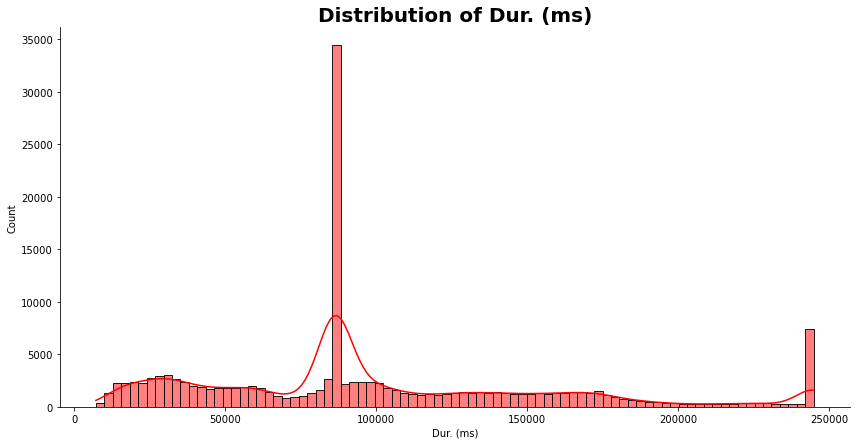

In [77]:
plot_hist(db, 'Dur. (ms)', 'Red')

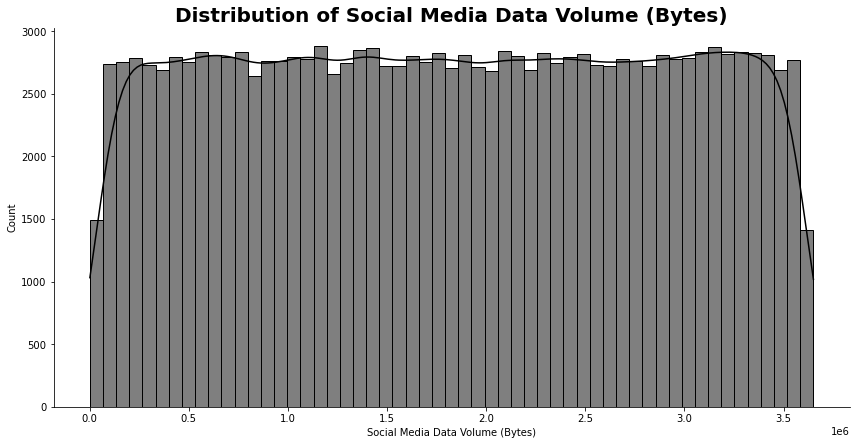

In [79]:
plot_hist(db, 'Social Media Data Volume (Bytes)', 'black')

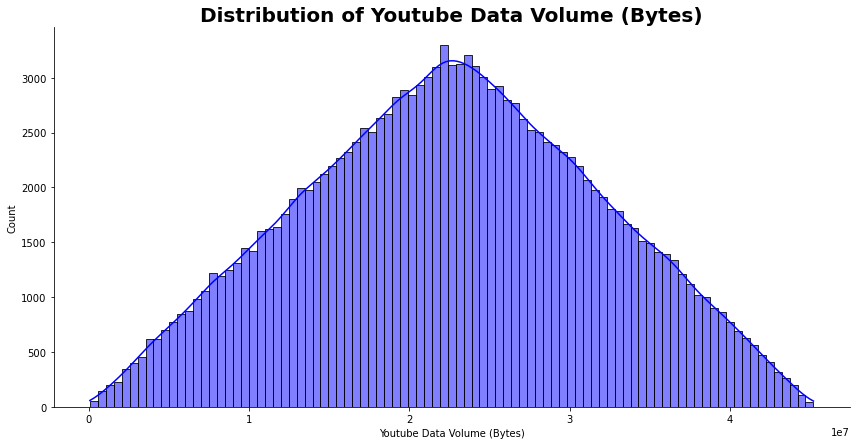

In [84]:
plot_hist(db, 'Youtube Data Volume (Bytes)', 'blue')

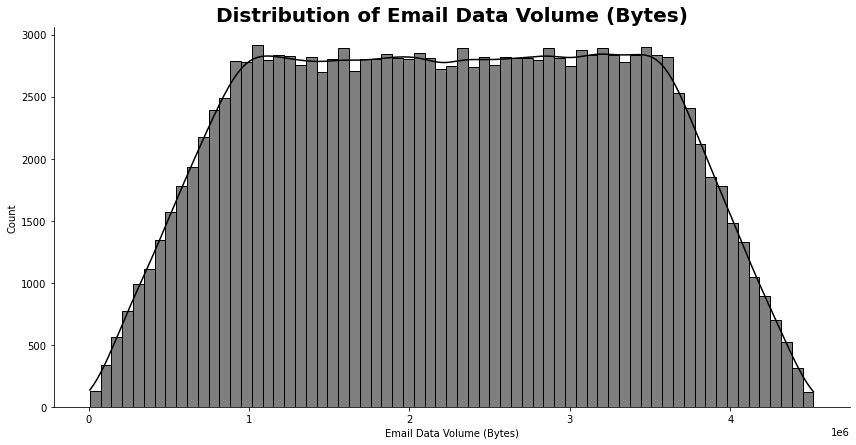

In [85]:
plot_hist(db, 'Email Data Volume (Bytes)', 'black')

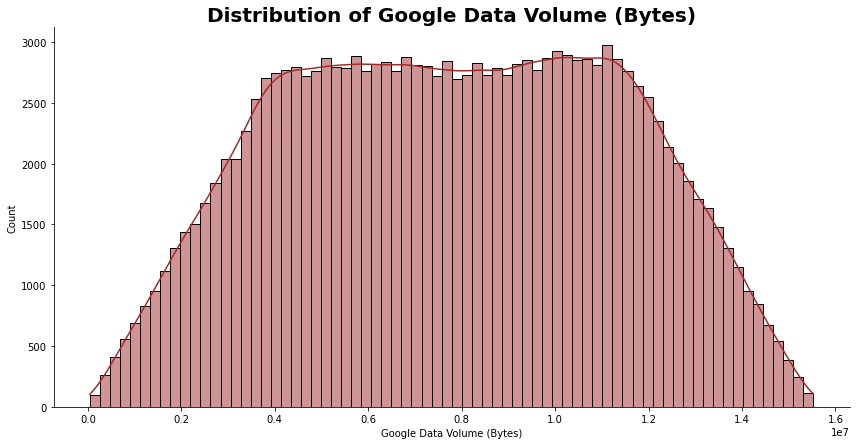

In [86]:
plot_hist(db, 'Google Data Volume (Bytes)', 'brown')

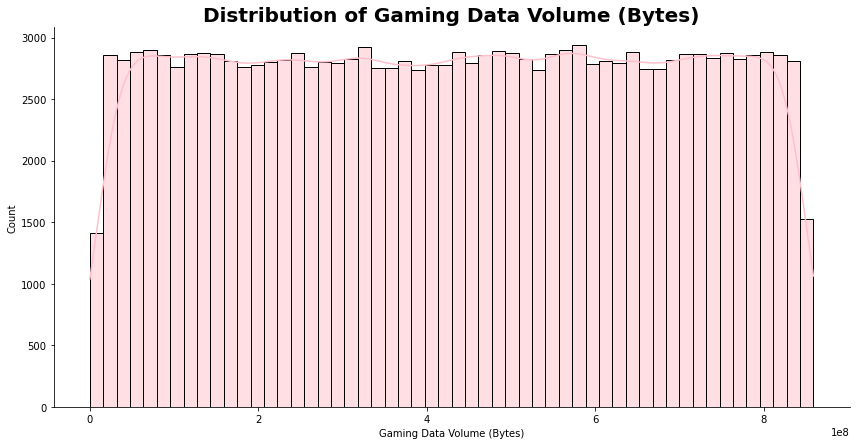

In [87]:
plot_hist(db, 'Gaming Data Volume (Bytes)', 'pink')

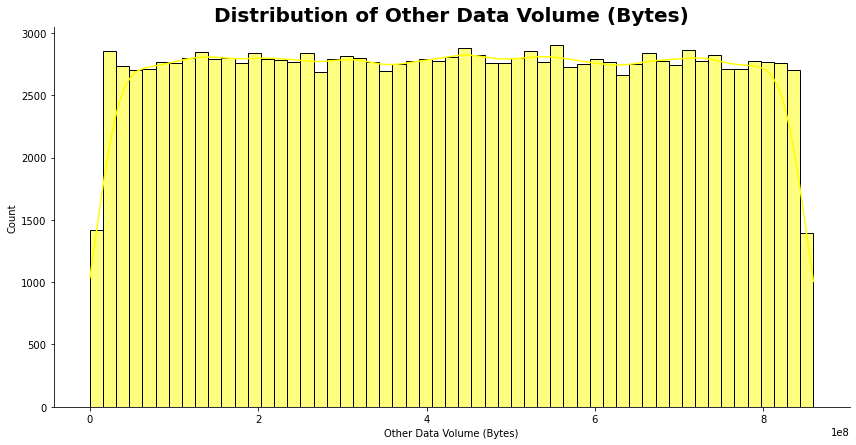

In [88]:
plot_hist(db, 'Other Data Volume (Bytes)', 'yellow')

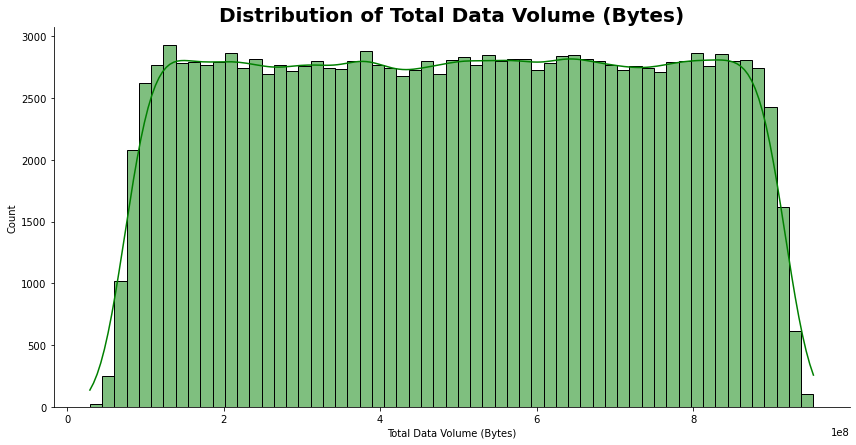

In [89]:
plot_hist(db, 'Total Data Volume (Bytes)', 'green')

### Bivariate Analysis

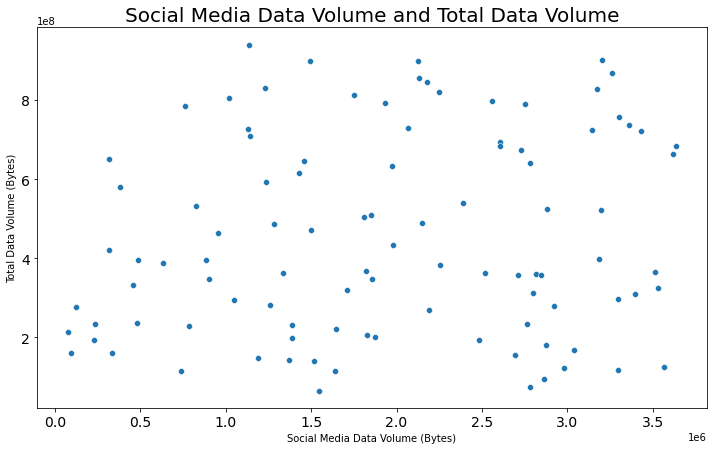

In [98]:
plot_scatter(db.sample(100), 'Social Media Data Volume (Bytes)', 'Total Data Volume (Bytes)', 'Social Media Data Volume and Total Data Volume')

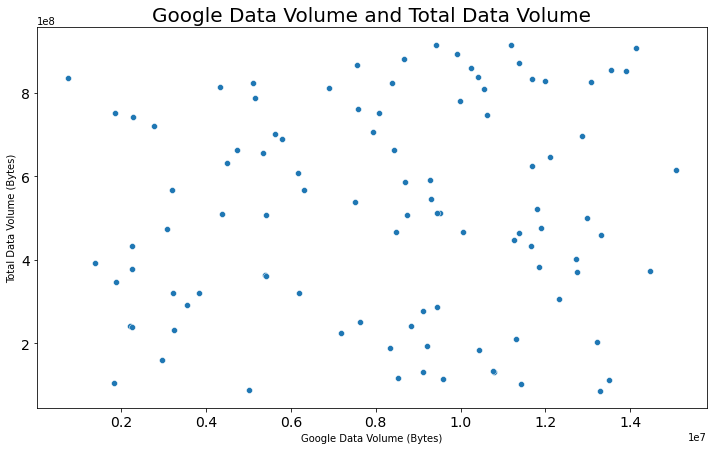

In [99]:
plot_scatter(db.sample(100), 'Google Data Volume (Bytes)', 'Total Data Volume (Bytes)', 'Google Data Volume and Total Data Volume')

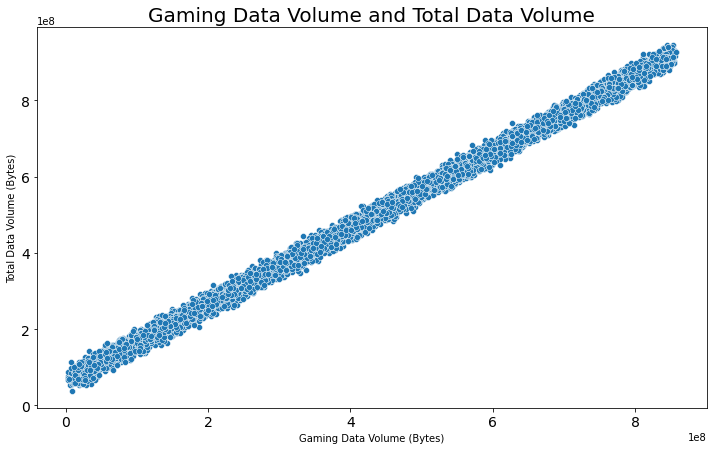

In [101]:
plot_scatter(db.sample(10000), 'Gaming Data Volume (Bytes)', 'Total Data Volume (Bytes)', 'Gaming Data Volume and Total Data Volume')

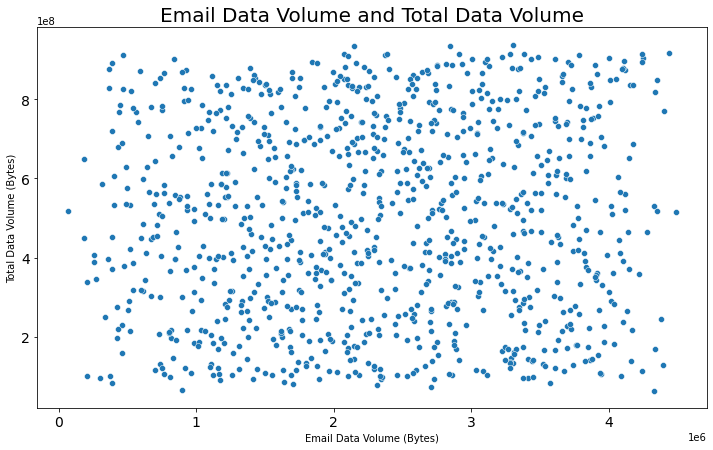

In [18]:
plot_scatter(db.sample(1000), 'Email Data Volume (Bytes)', 'Total Data Volume (Bytes)', 'Email Data Volume and Total Data Volume')

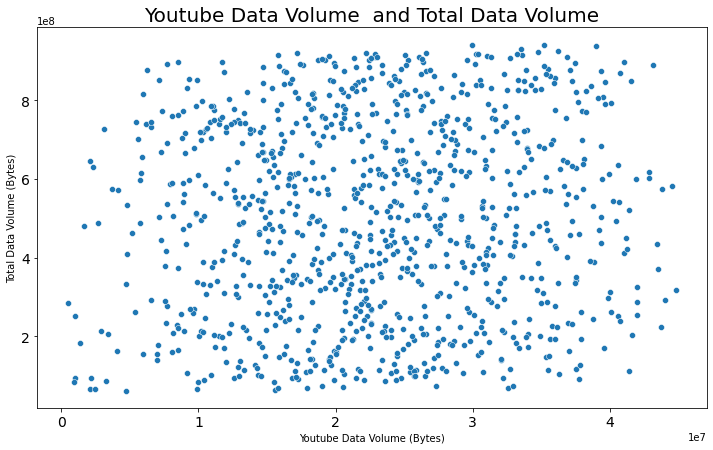

In [20]:
plot_scatter(db.sample(1000), 'Youtube Data Volume (Bytes)', 'Total Data Volume (Bytes)', 'Youtube Data Volume  and Total Data Volume')

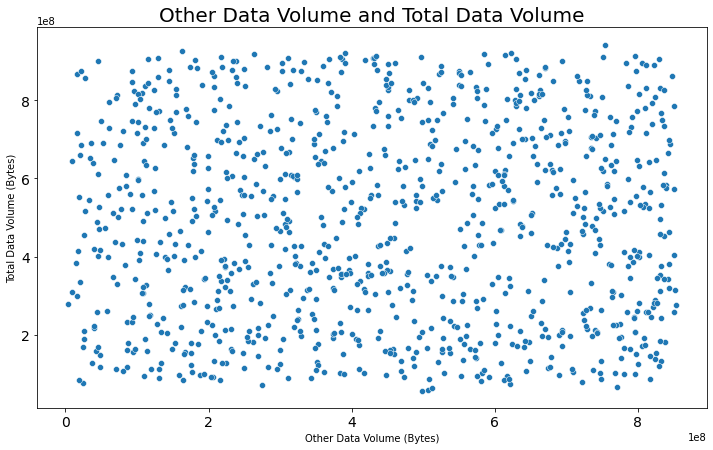

In [22]:
plot_scatter(db.sample(1000), 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)', 'Other Data Volume and Total Data Volume')

## Correlation

In [105]:
application_cols = ['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)', 'Email Data Volume (Bytes)',
    'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)', 'Gaming Data Volume (Bytes)',
    'Other Data Volume (Bytes)']

corr_df = db[application_cols].corr()
corr_df

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
Social Media Data Volume (Bytes),1.000000,-0.001708,0.004032,0.000548,0.001013,0.001082,0.006065
Google Data Volume (Bytes),-0.001708,1.000000,-0.000412,0.002277,-0.001902,-0.000994,-0.001727
Email Data Volume (Bytes),0.004032,-0.000412,1.000000,-0.002919,0.001029,-0.000644,-0.001299
Youtube Data Volume (Bytes),0.000548,0.002277,-0.002919,1.000000,0.002882,-0.002999,0.002969
Netflix Data Volume (Bytes),0.001013,-0.001902,0.001029,0.002882,1.000000,-0.003109,-0.009033
Gaming Data Volume (Bytes),0.001082,-0.000994,-0.000644,-0.002999,-0.003109,1.000000,-0.002661
Other Data Volume (Bytes),0.006065,-0.001727,-0.001299,0.002969,-0.009033,-0.002661,1.000000


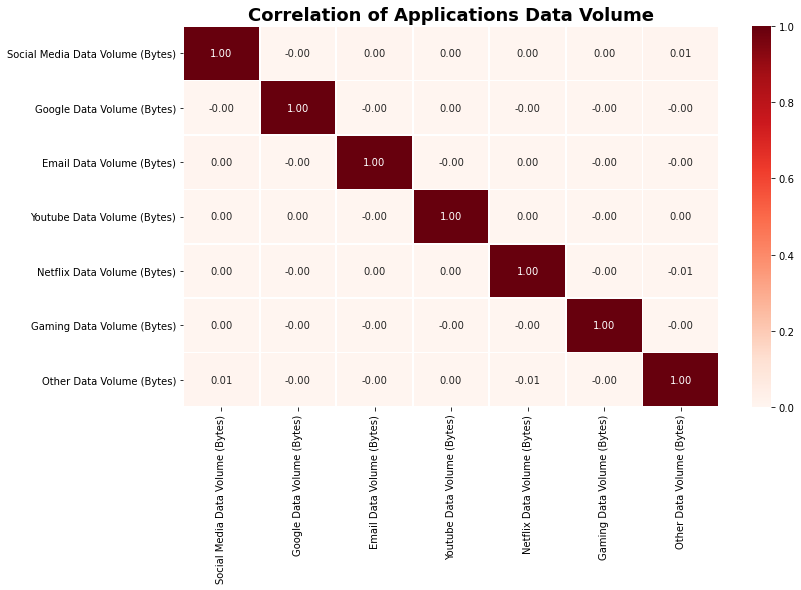

In [106]:
plot_heatmap(corr_df, "Correlation of Applications Data Volume")

## User Engagement Matrics 